In [1]:
import numpy

from hilbert import quantum
from hilbert.curves import lib

In [2]:
system = quantum.SplitToyTrain.mach_zehnder(1, 1, phases=(numpy.pi/7, -numpy.pi/7))
system.hop_op.o

1.0                                     2.0                      \
         -1.0                 0.0       1.0  2.0 -1.0                 0.0   
1.0 -1.0  0.0  0.000000+0.000000j  0.000000  0.0  0.0  0.000000+0.000000j   
     0.0  1.0  0.000000+0.000000j  0.000000  0.0  0.0  0.000000+0.000000j   
     1.0  0.0  0.900969+0.433884j  0.000000  0.0  0.0 -0.707107+0.000000j   
     2.0  0.0  0.000000+0.000000j  0.707107  0.0  0.0  0.000000+0.000000j   
2.0 -1.0  0.0  0.000000+0.000000j  0.000000  1.0  0.0  0.000000+0.000000j   
     0.0  0.0  0.000000+0.000000j  0.000000  0.0  1.0  0.000000+0.000000j   
     1.0  0.0  0.707107+0.000000j  0.000000  0.0  0.0  0.900969-0.433884j   
     2.0  0.0  0.000000+0.000000j  0.707107  0.0  0.0  0.000000+0.000000j   

                         
               1.0  2.0  
1.0 -1.0  0.000000  1.0  
     0.0  0.000000  0.0  
     1.0  0.000000  0.0  
     2.0 -0.707107  0.0  
2.0 -1.0  0.000000  0.0  
     0.0  0.000000  0.0  
     1.0  0.000000  0.0  
     2.0  0.707107  0.0

In [3]:
system = quantum.SplitToyTrain.mach_zehnder(100, 100, 100, phases=(numpy.pi/7, -numpy.pi/7))
std = 6
gaussian = system[0][1, 'delta']*system[1](lib.Gaussian(1, -1/(4*std**2), 20, pole=-35))

In [4]:
assert system.hop_op.is_unitary()

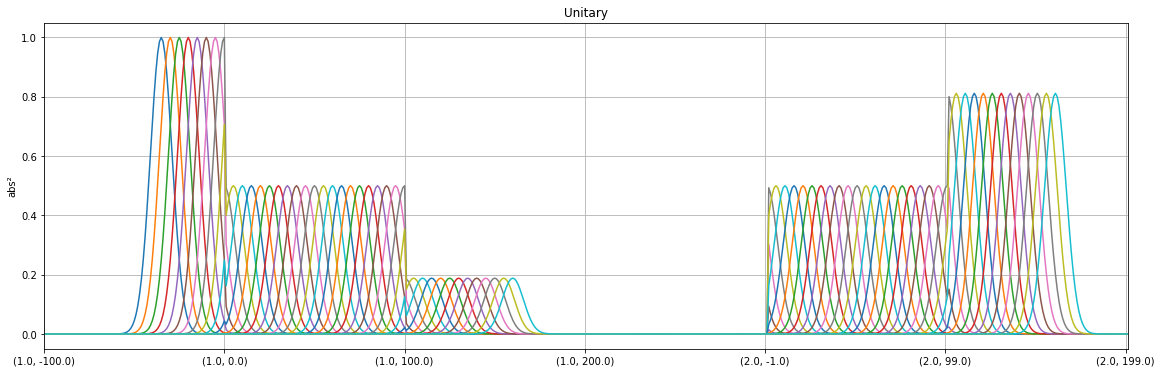

In [5]:
system.show_density_evolution(gaussian, 200, ncurves=40)

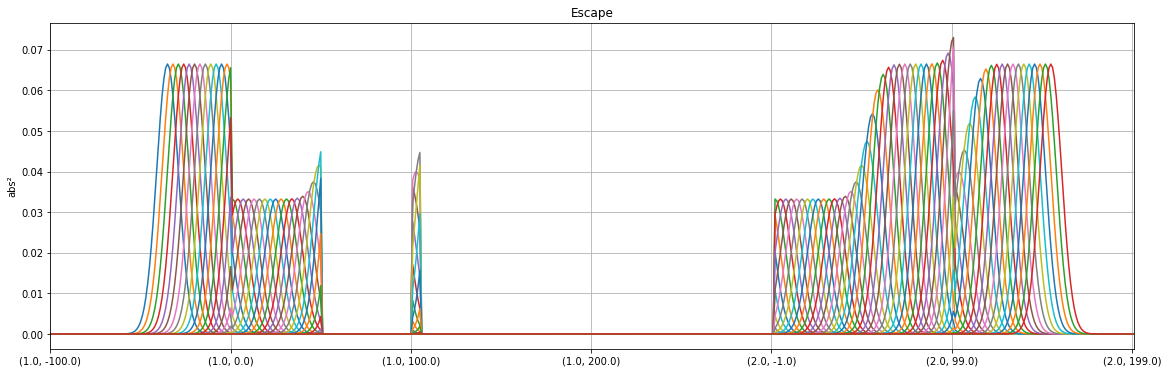

In [6]:
xc = sorted(system.attr['phases'], key=lambda it: it[0])[0]  # detector at internal arm
xe = (1, system.attr['splitters'][1] + 5*system.cell)  # exit detector
histories = system.collapsing_history(gaussian, xc, xe, go_on=lambda v: round(1 - v[-1].image[2,101:].norm, 31))
histories.simulate_density(step=3)

In [7]:
assert round(histories.weight, 9) == 0.25

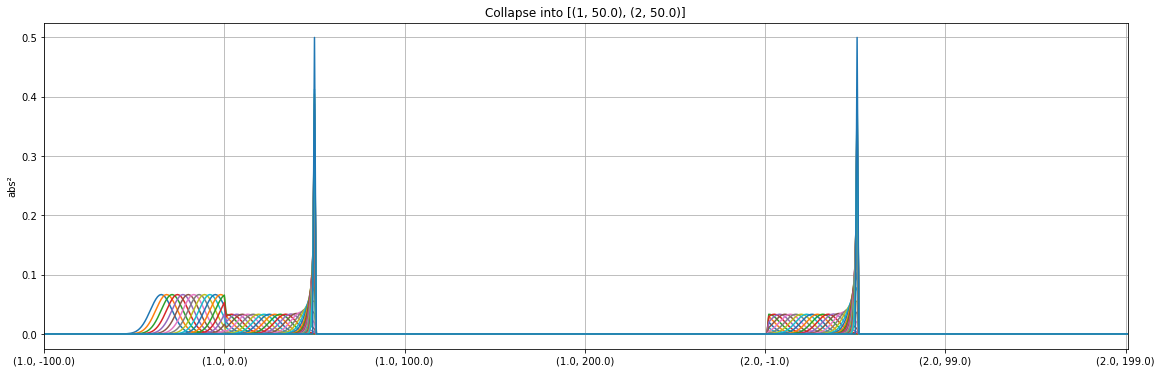

In [19]:
xc, xd = sorted(system.attr['phases'], key=lambda it: it[0])  # detector at each internal arm
xe = (1, system.attr['splitters'][1] + 5*system.cell)  # exit detector
histories = system.collapsing_history(gaussian, xc, xd, xe)
histories.simulate_density(step=3)

In [11]:
assert round(histories.weight, 26) == 0

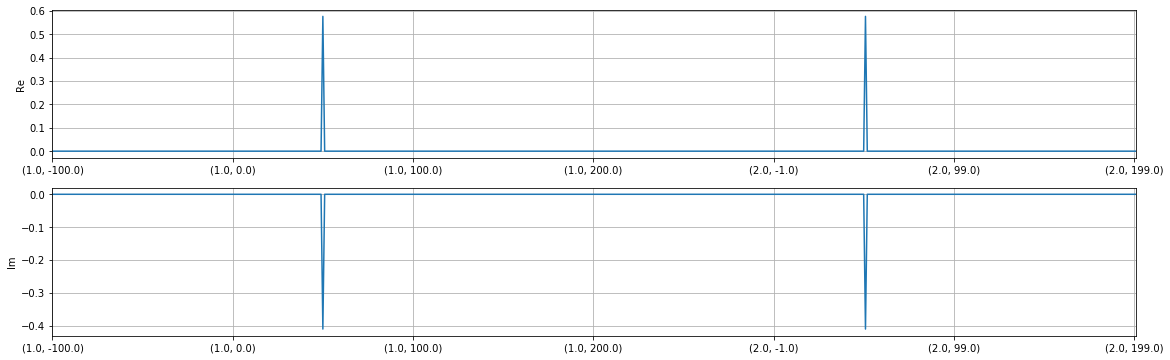

(<Figure size 1397.98x432 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f05190ae240>,
       dtype=object))

In [17]:
system.space.show_vectors(histories.o.iat[-1, 0])

In [22]:
histories.o.index

RangeIndex(start=0, stop=151, step=1)